#TITLE: CAR MILEAGE PREDICTION

#Objective
To develop a robust predictive model for estimating the mileage of automobiles based on relevant input parameters including number of cylinders	,displacement,	horsepower	,weight	,acceleration	,model_year	,origin(UK,Japan,Europe	),and  leveraging machine learning technique(RandomForestRegressor) to enhance accuracy and efficiency

Welcome to Car Mileage Prediction

About:

Experience the future of car shopping and performance analysis with our innovative web-based application, "Car Mileage Prediction". Say goodbye to guesswork and hello to data-driven decisions as you explore the fuel efficiency of automobiles like never before.

Features:

Effortless Predictions: Simply input the car's specifications—cylinders, displacement, horsepower, weight, acceleration, model year, and origin (UK, Japan, Europe)—and watch as our advanced machine learning algorithms predict its mileage (mpg) with pinpoint accuracy.

Interactive Visualizations: Dive deeper into the factors influencing mileage with interactive graphs and charts. Understand how each feature impacts fuel efficiency, empowering you to make informed choices.

User-Friendly Interface: Our intuitive interface makes it easy for anyone to use, whether you're a seasoned automotive professional or a first-time car buyer. Get instant results with just a few clicks.

Reliable Insights: Built on the latest research and continuously updated with new data, our prediction model delivers reliable insights you can trust. Stay ahead of the curve with the most accurate mileage estimates available.

Who Can Benefit:

Car Buyers:
 Make confident decisions when purchasing your next vehicle. Know exactly what to expect in terms of fuel efficiency, helping you find the perfect car that fits your lifestyle and budget.

Industry Experts:
 Engineers, researchers, and manufacturers can leverage our platform for performance analysis, product development, and market research. Stay competitive in an ever-evolving automotive landscape.
Join Us Today: Experience the future of car mileage prediction. Sign up now and take the first step towards smarter, more sustainable transportation choices.

#Data Source

Data is collected from Github page of YBI Foundation
https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv


#Loading Libraries

In [1]:
import pandas as pd #for DataExploration
import seaborn as sns #for Data Visualization
import matplotlib.pyplot as plt #for Data Visualization
from sklearn.ensemble import RandomForestRegressor#ML Model
from sklearn.model_selection import train_test_split # Data Selection(training,testing)
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error #Model Evaluation

#Loading Data

In [2]:
df=pd.read_csv("https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv")# loading the data(csv file) as Pandas DataFrame.

#Data Exploration

In [3]:
#to print top 5 rows of the dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
#to print the last 5 records from dataset
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [5]:
print("The Shape of the Dataset is : ",df.shape)#to check the shape of the dataset(rows,columns)


The Shape of the Dataset is :  (398, 9)


#Data Columns

In [6]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [7]:
df.info()# to print the clear i9nformation about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [8]:
#checking for any null values in the dataset
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

#Description

In [9]:
#Description about the dataset
df.describe()#it gives the clear statistical information about data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


#Data Visualizaion

Scatter plot between Horsepower and Accelaration

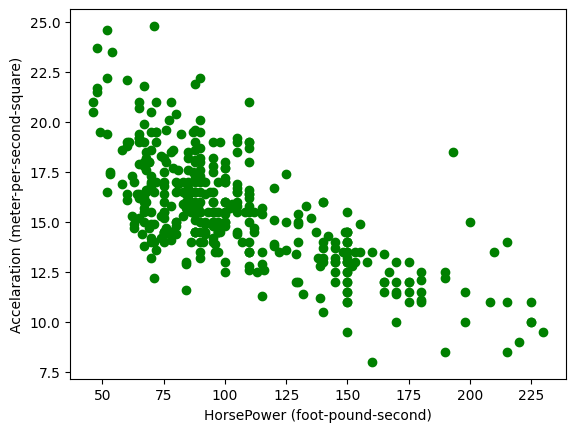

In [10]:
#Scatter plot between Horsepower and Accelaration
plt.scatter(x=df['horsepower'],y=df['acceleration'],c="green")
plt.xlabel("HorsePower (foot-pound-second)")
plt.ylabel("Accelaration (meter-per-second-square)")
plt.show()

**Count Plot**

<Axes: xlabel='cylinders', ylabel='count'>

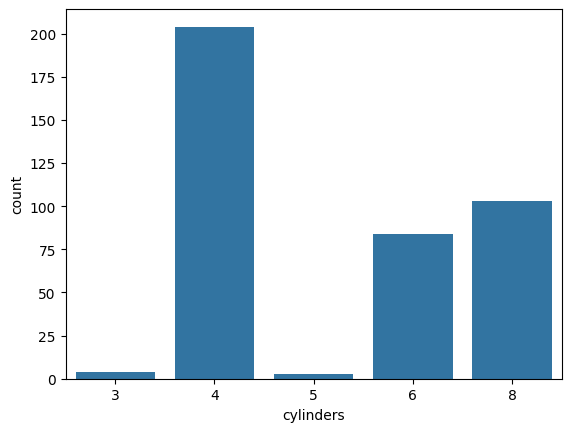

In [11]:
sns.countplot(x=df['cylinders'])# to understand the count of cylinders

Line Plot of Model Year

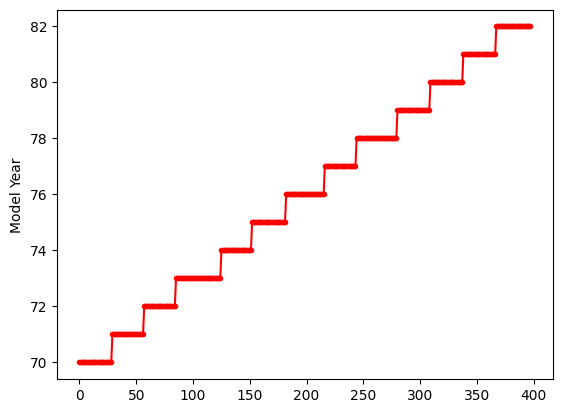

In [12]:
plt.plot(df['model_year'],c="red",marker='.')
plt.ylabel("Model Year")
plt.show()

#Regression Plot

<Axes: xlabel='acceleration', ylabel='mpg'>

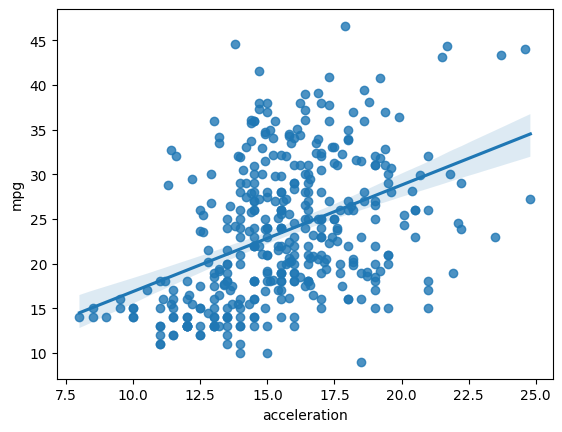

In [13]:
sns.regplot(x=df['acceleration'],y=df['mpg'])

#Pre-Processing

In [14]:
print("The Data Columns are : \n",df.columns)

The Data Columns are : 
 Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


Filling the missing values in horsepower column

In [15]:
df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)

In [16]:
# In the columns .name is not required for Processing
df=df.drop(['name'],axis=1)

In [17]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

0-USA
1-JAPAN
2-EUROPE

In [18]:
#encoding the origin column
df['origin'].replace(['usa','japan','europe'],[0,1,2],inplace=True)

In [19]:
#After Removal of those Un neccasary columns
df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,0
1,15.0,8,350.0,165.0,3693,11.5,70,0
2,18.0,8,318.0,150.0,3436,11.0,70,0


#Feature Extraction

In [20]:
#Independent Features
X=df.drop(['mpg'],axis=1)
Y=df['mpg']#Dependent Feature

#Training And Testing  Split of data

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)#30% testing and 70%training

In [22]:
x_train.head()#Independent trainig samples

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
180,4,121.0,115.0,2671,13.5,75,2
163,6,225.0,95.0,3785,19.0,75,0
222,8,260.0,110.0,4060,19.0,77,0
235,4,97.0,75.0,2265,18.2,77,1
82,4,120.0,97.0,2506,14.5,72,1


In [23]:
y_train.head(3)#Dependent training samples

180    25.0
163    18.0
222    17.0
Name: mpg, dtype: float64

In [24]:
x_train.shape

(278, 7)

In [25]:
x_test.shape

(120, 7)

In [26]:
y_train.shape

(278,)

In [27]:
y_test.shape

(120,)

#Modeling

In [28]:
#model object creation
model=RandomForestRegressor(n_estimators=25,criterion="absolute_error")

In [29]:
model.fit(x_train,y_train)#model training

RandomForestRegressor(criterion='absolute_error', n_estimators=25)

#Predictions

In [30]:
y_pred=model.predict(x_test)#storing the prediction in y_pred variable

In [31]:
print("Sample predictions are : ")
for i in range(1,6):
  print("{:.4f} mpg's".format(y_pred[i]))

Sample predictions are : 
15.8180 mpg's
26.7040 mpg's
30.5000 mpg's
28.2720 mpg's
30.7840 mpg's


#Model Evaluation


In [32]:
print("R2_Score : ",r2_score(y_test,y_pred))
print("Mean Squared Error : ",mean_squared_error(y_pred,y_test))
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))


R2_Score :  0.862423978939896
Mean Squared Error :  8.610362566666664
Mean Absolute Error :  2.022183333333333


We are Getting R2 Score as 91.24% then Our Model good enough to make prediction

#Explination

#Random Forest Regressor
Random Forest Regressor, a robust ensemble learning technique, constructs multiple decision trees from random subsets of the training data and features(cylinders, displacement, horsepower, weight, acceleration, model_year, and origin)..

By averaging predictions across these trees, it mitigates overfitting and enhances predictive accuracy, particularly effective for noisy or large datasets.

Despite its computational demands and reduced interpretability compared to simpler models, its resilience to outliers and capability to estimate feature importance make it a popular choice for regression tasks.

Overall, Random Forest Regressor stands as a versatile and powerful algorithm, offering a balance between accuracy and generalization in predictive modeling.

#Random Sampling:
 Random Forest randomly selects subsets of the training data and trains multiple decision trees independently.
#Decision Trees:
Each decision tree is constructed based on a random subset of features and a subset of the training data. This randomness helps to reduce overfitting and decorrelate the trees.
#Voting:
During prediction, each tree in the forest independently predicts the target variable. For regression tasks, the final prediction is typically the average (mean) of all the individual tree predictions.


Here's a brief explanation of each parameter of the  dataset:

1. **mpg (Miles per Gallon)**: This is the dependent variable, the one we want to predict. It represents how many miles a car can travel per gallon of fuel.

2. **cylinders**: The number of cylinders in the engine. This can affect the efficiency of fuel consumption.

3. **displacement**: The total volume of all the cylinders in the engine. Generally, larger displacement engines consume more fuel.

4. **horsepower**: The power output of the engine. Higher horsepower usually means higher fuel consumption.

5. **weight**: The weight of the car. Heavier cars typically consume more fuel.

6. **acceleration**: The time it takes for the car to reach a certain speed. This can indirectly affect fuel consumption.

7. **model_year**: The year the car was manufactured. Newer cars tend to have better fuel efficiency due to advancements in technology.

8. **origin**: The origin of the car (1 for American, 2 for European, 3 for Japanese). Different regions may have different engineering standards and fuel efficiency regulations.



Iam using Python libraries like pandas (for data manipulation), scikit-learn (for machine learning), and matplotlib or seaborn (for data visualization).

Here's a basic outline of the steps i have taken:

1. Load the dataset using pandas.
2. Preprocess the data (handling missing values, encoding categorical variables if necessary, etc.).
3. Split the data into training and testing sets.
4. Train a linear regression model using the training data.
5. Evaluate the model's performance using the testing data (e.g., calculate mean squared error or R-squared).
6. creating the ui for the same.


#Creating UserInterface

In [33]:
!pip install gradio

  Attempting uninstall: typer
    Found existing installation: typer 0.9.4
    Uninstalling typer-0.9.4:
      Successfully uninstalled typer-0.9.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.7.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
weasel 0.3.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.


In [34]:
import gradio as gr

In [35]:
df['acceleration'].max()

24.8

In [36]:
x_train.columns

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin'],
      dtype='object')

In [37]:
def predicto(NumberofCylinders, Displacement, HorsePower, Weight, Accelaration, Model_Year, Origin):
    data = {
        'cylinders': NumberofCylinders,
        'displacement': Displacement,
        'horsepower': HorsePower,
        'weight': Weight,
        'acceleration': Accelaration,
        'model_year': Model_Year,
        'origin': Origin
    }
    # Provide an index for the DataFrame
    sample = pd.DataFrame(data, index=[0])
    pred = model.predict(sample)
    res = "Predicted Mileage is {:.2f} Miles/Gallon".format(pred[0])
    return res

#Sample Prediction for UI

In [38]:
res = predicto(4,107,86,2464,15.5,76,2)
res

'Predicted Mileage is 25.90 Miles/Gallon'

In [39]:
df.sample()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
316,19.1,6,225.0,90.0,3381,18.7,80,0


In [40]:
app=gr.Interface(
    fn=predicto,
    inputs=[gr.Slider(1,10,step=1),
            gr.Textbox(label="Displacement(in KM's)"),
            gr.Textbox(label="HoursePower(in FPS's)"),
            gr.Textbox(label="Weight of the Car(in KG's)"),
            gr.Slider(1,25,value=float),
            gr.Textbox(label="Model_Year(in Years(ex:1992--> give 92))"),
            gr.Radio([0,1,2],label="Origin",info="Select the Origin 0-USA , 1-JAPAN , 2-EUROPE")],
    outputs=["textbox"],
    theme=gr.themes.Monochrome(),
    description="Explore Car Mileage Prediction by Abhishek C B, a passionate ML enthusiast. This innovative web application simplifies car shopping and performance analysis, delivering precise mileage estimates and actionable insights. Users input car specifications effortlessly, receiving accurate mpg predictions instantly. Interactive visualizations offer deeper insights into fuel efficiency factors. Abhishek C B's dedication ensures continuous updates with the latest data, providing reliable results. Car buyers make informed decisions, selecting vehicles aligned with their needs and reducing environmental impact. Industry experts utilize the platform for comprehensive performance analysis and market research, staying competitive in the automotive industry. Join on this journey towards smarter, sustainable transportation choices.",
    title="Car Mileage Prediction 🚘💡 Build By Abhishek C B [An ML 🤖Enthusiast]",
    examples=[
        [4 , 98.0	, 79.0 , 2255	, 17.7 , 76 , 0],
        [8 , 91.0 , 67.0 , 1965 , 15.0 , 82 , 1],
        [4 , 98.0 , 90.0 , 2265 , 15.5 , 73 , 2]]

)

In [41]:
app.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a3a0af5a174eef55c4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
